# Descriptive Analysis Notebook

#### This notebook contains a demonstration of the tools necessary for conducting descriptive analysis of the data. This includes things such as frequency analysis, descripting statistics and temporal frequency.

In [1]:
import trt_API.process as proc
import trt_API.analysis as ana
import pandas as pd
import matplotlib.pyplot as plt
SORTED = False

## Variables for Analysis

In [2]:
# Set the path to the parent directory containing all Tweets of interest
DIRECTORY = './tweets/*'
# Set to True to isolate english language tweets
ENGLISH = False

## Load Tweet and Generate Dataframe

In [3]:
tweet_objects = proc.loadTweetObjects(DIRECTORY)
encoding = True #Use False on Macs for better results
df = proc.convertTweetsToDataframe(tweet_objects, ENGLISH, encoding)

Loaded utf-8 df.
Initial size: 16042
Dropping duplicates...
Final size: 10472


## Extract Potential Cashtags

In [4]:
ctdf = proc.extractPossibleCashtags(df)

Total potential Cashtags: 25


## Removing Noisy Tweets

In [5]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Noisy words can be identified to use to filter such tweets.
*** Enter these words below in the noisy_terms list.
'''
noisy_terms = []
cldf = proc.removeNoisyTerms(df, noisy_terms)
cldf

Removed 0 noisy terms.


date  followers        username  \
0      Jun 01 20:02:51 2018\t0         88       Yohanan_L   
1      Jun 01 22:19:01 2018\t0        464       Kiakkye30   
2      Jun 08 00:04:48 2018\t0       1019       KessprdGB   
3      Jun 08 03:27:48 2018\t0         24  quynhnguyen153   
4      Jun 08 07:44:53 2018\t0          1       mlqbuot27   
...                        ...        ...             ...   
16032  Jul 10 22:48:21 2019\t0        213    KyleLGurrola   
16034  Jul 10 23:02:54 2019\t0       3344      NW_StayDet   
16036  Jul 10 23:08:36 2019\t0         36        TOMMMLDN   
16038  Jul 10 23:27:23 2019\t0        229    GenDovinBaan   
16040  Jul 10 23:29:22 2019\t0       1409     UncleMax313   

                       location  \
0                        France   
1                         Haiti   
2                          None   
3                          None   
4      กรุงเทพมหานคร, ประเทศไทย   
...                         ...   
16032      San Jose, California   
16034               Detroit, MI   
16036       Chernobyll, Ukraine   
16038       The Plane of Ixalan   
16040        Michigan and Texas   

                                                   tweet                   id  \
0      @AnthonyParasole @kanyewest All right didn't k...  1002641647736377346   
1      RT @TwitterMusic: Give #NewMusicFriday a try. ...  1002675915221098496   
2      RT @GOT7Official: [ #GOT7NOW ] See you tomorro...  1004876863670374401   
3      RT @chanyeolit: #CHANYEOL #EXO #Monster #찬열 @w...  1004927950293045248   
4      RT @GOT7Official: [ #GOT7NOW ] See you tomorro...  1004992647411298310   
...                                                  ...                  ...   
16032  RT @drewisgooden: Excuse me @Delta but this is...  1149087994898288642   
16034  @ComedianTheDA @GAFollowers @Delta @ABC Right....  1149091656508923909   
16036  RT @Micahlifa: Video I took from my seat on my...  1149093090973704192   
16038  RT @Micahlifa: Video I took from my seat on my...  1149097817962680320   
16040  @nysteve27 @AmericanAir Steve, I use to work i...  1149098317089054721   

                                          original_tweet  
0                                                   None  
1      Give #NewMusicFriday a try. 🎶🎵 @DanAndShay ➖ A...  
2      [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥...  
3      #CHANYEOL #EXO #Monster #찬열 @weareoneEXO 🍾 Mon...  
4      [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥...  
...                                                  ...  
16032  Excuse me @Delta but this is outrageous. I jus...  
16034                                               None  
16036  Video I took from my seat on my flight from At...  
16038  Video I took from my seat on my flight from At...  
16040                                               None  

[10472 rows x 7 columns]

## Remove Retweets

In [6]:
cldf_no_RT, cldf = proc.removeRetweets(cldf)
cldf

Removed 4110 duplicates.


/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/process.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT'][df.tweet.astype(str).str[0:2] == 'RT'] = df.tweet.str.split(':',expand=True).iloc[:,0]


date  followers        username  \
0      Jun 01 20:02:51 2018\t0         88       Yohanan_L   
1      Jun 01 22:19:01 2018\t0        464       Kiakkye30   
2      Jun 08 00:04:48 2018\t0       1019       KessprdGB   
3      Jun 08 03:27:48 2018\t0         24  quynhnguyen153   
4      Jun 08 07:44:53 2018\t0          1       mlqbuot27   
...                        ...        ...             ...   
16032  Jul 10 22:48:21 2019\t0        213    KyleLGurrola   
16034  Jul 10 23:02:54 2019\t0       3344      NW_StayDet   
16036  Jul 10 23:08:36 2019\t0         36        TOMMMLDN   
16038  Jul 10 23:27:23 2019\t0        229    GenDovinBaan   
16040  Jul 10 23:29:22 2019\t0       1409     UncleMax313   

                       location  \
0                        France   
1                         Haiti   
2                          None   
3                          None   
4      กรุงเทพมหานคร, ประเทศไทย   
...                         ...   
16032      San Jose, California   
16034               Detroit, MI   
16036       Chernobyll, Ukraine   
16038       The Plane of Ixalan   
16040        Michigan and Texas   

                                                   tweet                   id  \
0      @AnthonyParasole @kanyewest All right didn't k...  1002641647736377346   
1      RT @TwitterMusic: Give #NewMusicFriday a try. ...  1002675915221098496   
2      RT @GOT7Official: [ #GOT7NOW ] See you tomorro...  1004876863670374401   
3      RT @chanyeolit: #CHANYEOL #EXO #Monster #찬열 @w...  1004927950293045248   
4      RT @GOT7Official: [ #GOT7NOW ] See you tomorro...  1004992647411298310   
...                                                  ...                  ...   
16032  RT @drewisgooden: Excuse me @Delta but this is...  1149087994898288642   
16034  @ComedianTheDA @GAFollowers @Delta @ABC Right....  1149091656508923909   
16036  RT @Micahlifa: Video I took from my seat on my...  1149093090973704192   
16038  RT @Micahlifa: Video I took from my seat on my...  1149097817962680320   
16040  @nysteve27 @AmericanAir Steve, I use to work i...  1149098317089054721   

                                          original_tweet                RT  
0                                                   None              None  
1      Give #NewMusicFriday a try. 🎶🎵 @DanAndShay ➖ A...  RT @TwitterMusic  
2      [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥...  RT @GOT7Official  
3      #CHANYEOL #EXO #Monster #찬열 @weareoneEXO 🍾 Mon...    RT @chanyeolit  
4      [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥...  RT @GOT7Official  
...                                                  ...               ...  
16032  Excuse me @Delta but this is outrageous. I jus...  RT @drewisgooden  
16034                                               None              None  
16036  Video I took from my seat on my flight from At...     RT @Micahlifa  
16038  Video I took from my seat on my flight from At...     RT @Micahlifa  
16040                                               None              None  

[10472 rows x 8 columns]

In [7]:
print(cldf_no_RT.shape[0])

6362


## Convert Tweets to List

In [8]:
cldf['original_tweet'][cldf.original_tweet == 'None'] = cldf['tweet']
cldf['tweet'] = cldf['original_tweet']
del cldf['original_tweet']
print(cldf.head())
tweets = list(cldf.tweet)

                      date  followers        username  \
0  Jun 01 20:02:51 2018\t0         88       Yohanan_L   
1  Jun 01 22:19:01 2018\t0        464       Kiakkye30   
2  Jun 08 00:04:48 2018\t0       1019       KessprdGB   
3  Jun 08 03:27:48 2018\t0         24  quynhnguyen153   
4  Jun 08 07:44:53 2018\t0          1       mlqbuot27   

                   location  \
0                    France   
1                     Haiti   
2                      None   
3                      None   
4  กรุงเทพมหานคร, ประเทศไทย   

                                               tweet                   id  \
0  @AnthonyParasole @kanyewest All right didn't k...  1002641647736377346   
1  Give #NewMusicFriday a try. 🎶🎵 @DanAndShay ➖ A...  1002675915221098496   
2  [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥...  1004876863670374401   
3  #CHANYEOL #EXO #Monster #찬열 @weareoneEXO 🍾 Mon...  1004927950293045248   
4  [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥...  1004992647411298310   

       

<ipython-input-8-a3c3d762bb2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf['original_tweet'][cldf.original_tweet == 'None'] = cldf['tweet']


## Hashtag Frequencies

In [9]:
hashtags = [""]

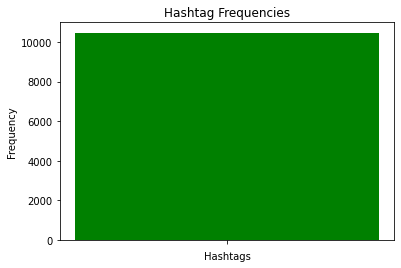

[10472]

In [10]:
ana.countItems(hashtags,tweets,PLOT=True,PRINT=False)

In [11]:
usernames = []

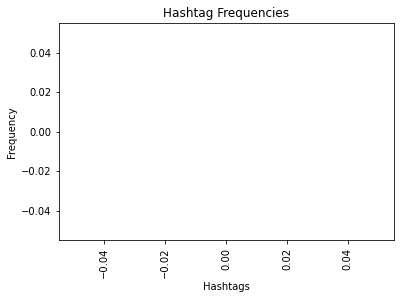

[]

In [12]:
ana.countItems(usernames,tweets,PLOT=True,PRINT=False)

## Sort By Date

In [13]:
sorted_cldf, SORTED = ana.sortByDate(cldf,SORTED,PRINT_TOP=False,TOP=10)

In [14]:
cldf.head()

date  followers        username               location  \
13247 2018-03-30 02:24:13         86         got7run               31/05/15   
13248 2018-03-30 02:58:39        271           Xreo0                   None   
13249 2018-03-30 07:02:29      47858         AraiEij                   None   
13250 2018-03-30 08:51:10        909  DAYDREAM_09_04  Corrientes, Argentina   
13251 2018-03-30 10:15:24         26          dldbr5                   None   

                                                   tweet                  id  \
13247  [STREAM] 180330 KBS&lt;Music Bank&gt; เวลา 15....  979544798431342593   
13248                      2 minutes😭💔💔#WelcomeOliviaHye  979553463859326977   
13249  Poppies..       🌿🌺🌿🌺🌿🌺 #LovelyEvening https://...  979614826510008320   
13250  #Repost bts.0ffcial (get_repost)・・・JIKOOK or T...  979642177570656257   
13251  Look - GOT7https://t.co/VrzKFobSes#GOT7 #갓세븐#E...  979663375595655168   

                     RT  
13247    RT @CRUSHonBAM  
13248              None  
13249     RT @semljnika  
13250              None  
13251  RT @GOT7Official

## Plot by Month

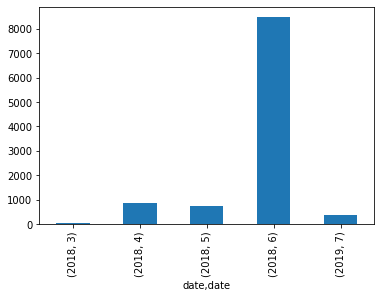

In [15]:
cldf.tweet.groupby([cldf['date'].dt.year,cldf["date"].dt.month]).count().plot(kind="bar")

## Sort by Number of Followers

In [16]:
TOP_N = 20 ## USE THIS VARIABLE TO SET THE NUMBER OF USERS TO ANALYZE
cldf.followers = df.followers.astype(int)
cldf.sort_values(by='followers',ascending=False,inplace=True)
cldf.head(TOP_N)

date  followers         username  \
7711  2018-06-18 23:21:00    4038926     revistasuper   
15845 2019-07-02 15:57:24     522297    flightradar24   
15993 2019-07-10 14:22:07     305361      KatiePiper_   
218   2018-06-18 21:03:33     261184       Muse__Love   
7496  2018-06-08 11:04:36     250360      koji2530112   
631   2018-06-24 19:42:11     201073         cattina3   
6510  2018-06-04 15:55:59     185818  BastrikDorianGr   
12476 2018-06-23 19:32:29     179102      marianoalbi   
15306 2019-07-05 08:33:43     141046    TamekaRaymond   
3734  2018-06-21 18:00:01     129561   RoomMateHotels   
9510  2018-06-05 18:42:39     124615        AAJELPOST   
15581 2019-07-07 14:36:56     124613     XXXBellaRose   
13803 2018-04-22 15:12:21     117525            oda_f   
14042 2018-04-24 11:52:02     115234        NiaAaliya   
11820 2018-06-26 19:05:29     110825    ilkaycandogan   
1411  2018-06-02 19:23:29     110242     2_wounds2014   
1579  2018-06-03 16:00:32     103685   Sophia1Kamila_   
15286 2018-06-27 19:15:03      99303   General_Sharaf   
755   2018-06-21 22:57:11      98379         V2_N_St0   
14052 2018-04-24 16:52:52      96602  weirddiaryofDOU   

                                         location  \
7711                            São Paulo, Brazil   
15845                           Stockholm, Sweden   
15993                                      London   
218                                          None   
7496                                        Japan   
631                  Italy❤#1DDrive❤#TeamStallion   
6510                                         None   
12476                    Mar del Plata, Argentina   
15306                           Recaliberating...   
3734                               Madrid, España   
9510                                         None   
15581                               #bellasfellas   
13803                                       Japan   
14042                                        None   
11820                                        None   
1411                 ☜ هي لحظات تذهب في لحظة 💜 !✶   
1579                               #ᎶคιɲωιтнᎢᎻคℒᎽ   
15286                                        None   
755    #TeamWolFPack #TmLily  #TmKindness #TM_BFF   
14052                                suriye değil   

                                                   tweet                   id  \
7711   rest in peace 🙏🙏🙏  I never told you how much y...  1008852107561185281   
15845  Is Canada on your bucket list? We've flights f...  1146085473024172034   
15993  .@HarperCollinsUK to supply flying library for...  1148960597083643904   
218    🚨Retweet &amp; Like Follow immediately.❗💰🔴🔻Ret...  1008817517106786305   
7496   Follow everyone who retweets and likes this🌹#i...  1005042907768745985   
631    Follow everyone who retweets and likes this co...  1010971367720783875   
6510   Join YES to celebrate #YES50 at Theatre at Wes...  1003666685306572801   
12476  Gain 1000 more followers in 35 mins!!✓Retweet ...  1010606538774450176   
15306  @AirFranceFR  I have been waiting for 2 hours ...  1147060980033175553   
3734   180616 GOT7 2018 WORLD TOUR EYES ON YOU IN TAI...  1009858493044518912   
9510   The UN envoy to Yemen leaves Sanaa after encou...  1004071016212189185   
15581  @XXXBellaRose @AmericanAir Second tweet I've s...  1147877162222936065   
13803  WHO'S ROCKING WIT DA BEST... #TheOhioPlayersPr...   988073026414567424   
14042  If your foresight is incredible   Stay stubbor...   988747390806044673   
11820  @DemetAkalin You’re mom @KimKardashian https:/...  1011686907594575873   
1411   The train is still in motion!💯🌍🔥Retweet 🔥Like🔥...  1002994128668561409   
1579   Gain 200+ followers✨Follow me &amp; all who Re...  1003305442477576194   
15286  The aggression clearly violates the human righ...  1012051702990680066   
755    Follow everyone who retweets and likes this co...  1009933277476655104   
14052  Antique Round Safety Glasses Goggles #Steampun...   988823097980674048   

       

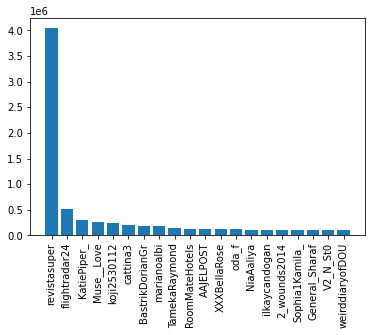

In [17]:
plt.bar(cldf.iloc[:TOP_N].username.astype(str),cldf.iloc[:TOP_N].followers.astype(int))
plt.xticks(rotation='vertical')
plt.show()

## Top Hashtags

[244, 247, 253, 265, 280, 304, 310, 320, 337, 341, 410, 419, 454, 479, 526, 702, 852, 946, 1062, 1132]


/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52268 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from c

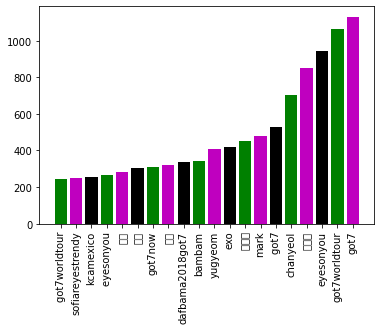

In [18]:
TOP_N = 20 ## USE THIS NUMBER TO SET THE NUMBER OF TOP HASHTAGS TO LOOK AT
ana.topHashtags(tweets,TOP_N)

## Top User Mentions

[21, 21, 22, 22, 25, 27, 31, 31, 36, 50, 54, 59, 72, 98, 100, 146, 217, 329, 565, 643]


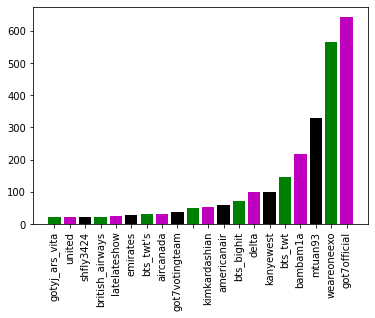

In [19]:
TOP_N = 20 ## USE THIS NUMBER TO SET THE NUMBER OF TOP USER MENTIONS TO LOOK AT
ana.topUserMentions(tweets,TOP_N)